# Assignment 4

# Grapes to Greatness: Machine Learning in Wine Quality Prediction


#### 21BCE0516
#### ANUSHKA
##### anushka.2021a@vitstudent.ac.in

In [1]:
import pandas as pd

1. load the dataset

In [4]:

df = pd.read_csv('winequality-red.csv')


In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Data preprocessing including visualization


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


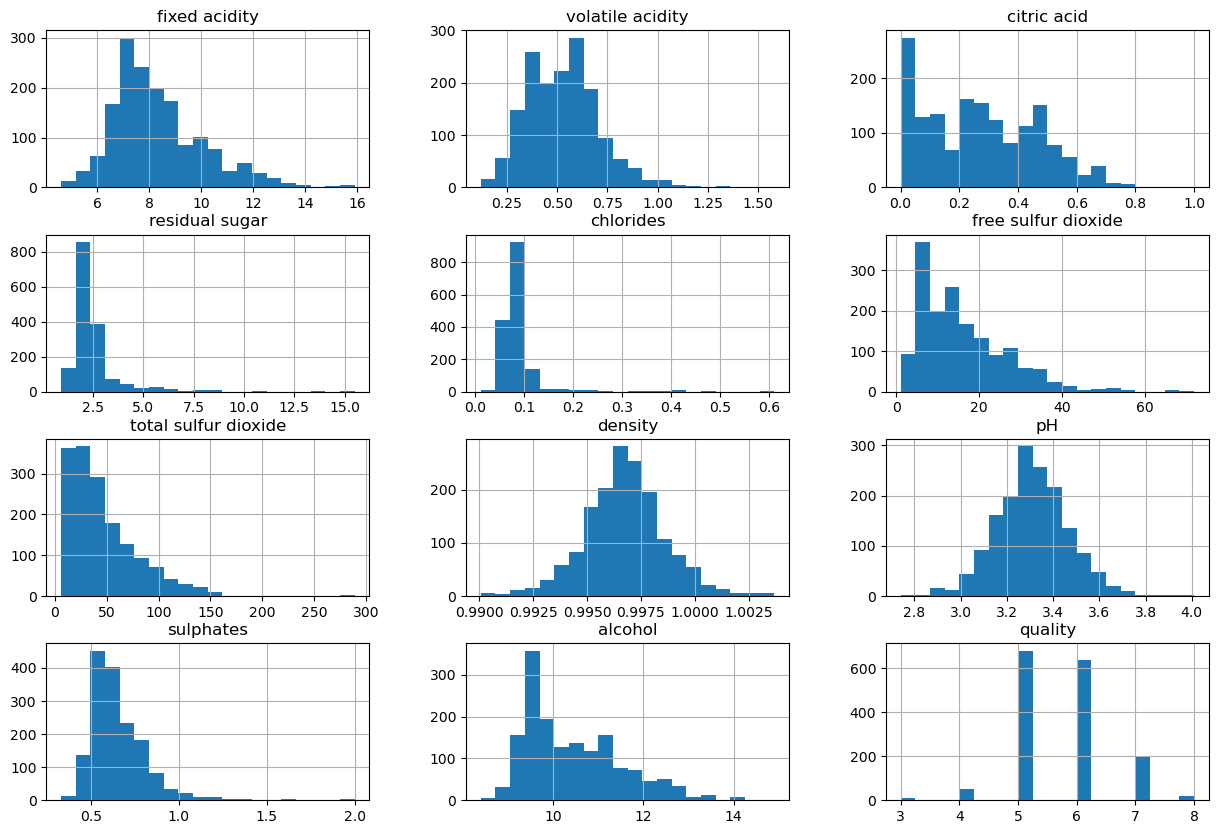

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()


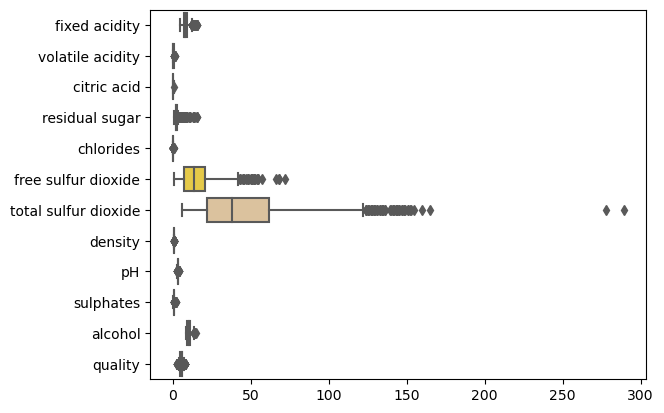

In [10]:
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()


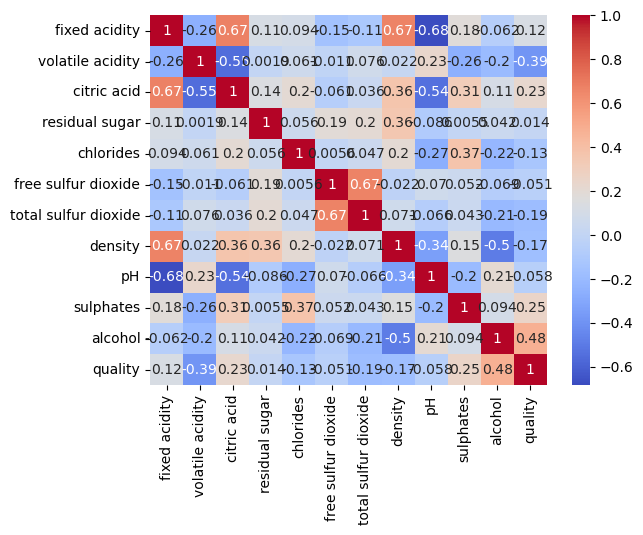

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [13]:
# Check for missing values
df.isnull().sum()
#since no missing values, dont have to deal with it

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:

from sklearn.preprocessing import StandardScaler


# Define the columns for feature scaling (exclude the target variable)
columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

# Feature Scaling (Standardization)
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verify the transformed DataFrame
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0 -0.960246        5  
1 -0.58477

In [18]:
X = df.drop(columns=['quality'])
y = df['quality']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.5035304415524375
Mean Squared Error (MSE): 0.39002514396395493
R-squared (R2) Score: 0.4031803412796219


4.Evaluate the model


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.624519930798013


In [24]:
n = len(X_test)  # Number of samples
k = len(X_test.columns)  # Number of features

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared (Adjusted R2): {adjusted_r2}")


Adjusted R-squared (Adjusted R2): 0.38186535346817985


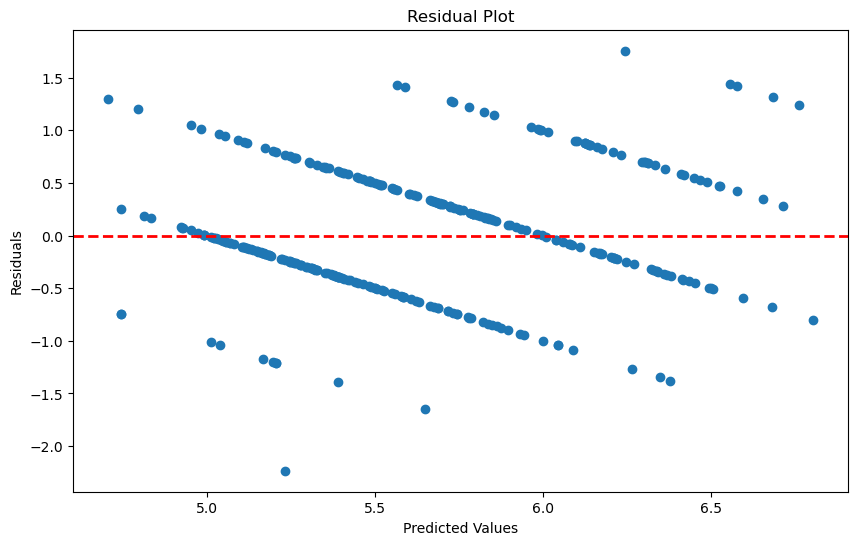

In [25]:
residuals = y_test - y_pred

# Create residual plots
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residual Plot")
plt.show()


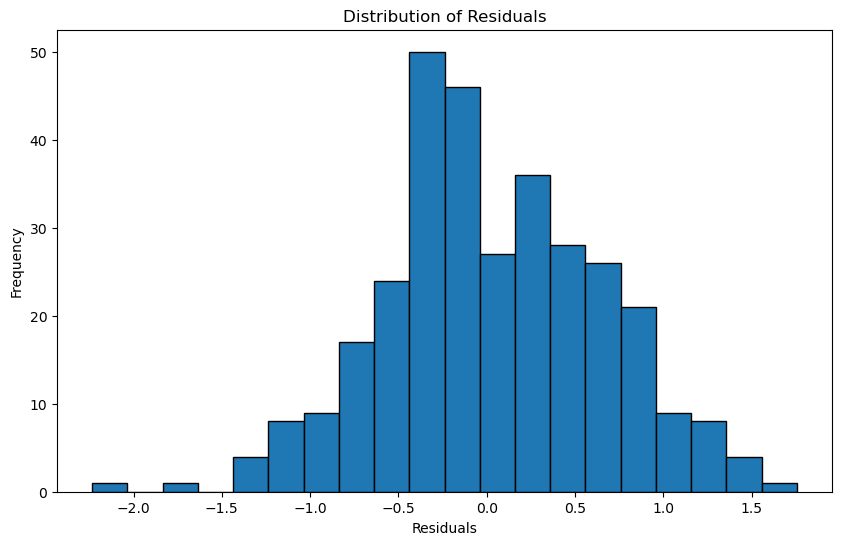

In [26]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cross_val_scores)

print(f"Cross-Validation RMSE scores: {rmse_scores}")


Cross-Validation RMSE scores: [0.66737398 0.6724422  0.66661889 0.63973512 0.65722039]


5.Test with random observation

In [39]:
import pandas as pd
import numpy as np

# Define hypothetical values for the features
random_observation = {
    'fixed acidity': np.random.uniform(4.6, 15.9),
    'volatile acidity': np.random.uniform(0.12, 1.58),
    'citric acid': np.random.uniform(0.0, 1.0),
    'residual sugar': np.random.uniform(0.9, 15.5),
    'chlorides': np.random.uniform(0.012, 0.611),
    'free sulfur dioxide': np.random.uniform(1, 72),
    'total sulfur dioxide': np.random.uniform(6, 289),
    'density': np.random.uniform(0.99007, 1.00369),
    'pH': np.random.uniform(2.74, 4.01),
    'sulphates': np.random.uniform(0.33, 2.0),
    'alcohol': np.random.uniform(8.4, 14.9)
}

# Create a DataFrame for the random observation
random_observation_df = pd.DataFrame([random_observation])


In [40]:
# Make predictions using the trained model
predicted_quality = model.predict(random_observation_df)

print(f"Predicted Wine Quality: {predicted_quality[0]}")


Predicted Wine Quality: 4.15743449496132
